# Kaggle Forest Challenge - Double Classif

Working on this dataset, we realised that some classes were pretty to each other, such as Cover_Type 1 and 2 (see. kaggle_forest_eda.ipynb). 
So he idea of this notebook is to perform a double classification. The first one to split the data into 2 groups (gathering several categories). And then, we perform 2 distinct classifications : one on each group. 

In [1]:
# Import useful packages
import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from lightgbm import LGBMClassifier

from my_toolkit import *

folder_path = '/Users/camilleepitalon/Documents/DSB/11_machine_learning_2/Project'
os.chdir(folder_path)
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test-full.csv')

In [ ]:
def local_metrics(self, unfitted_model=None, test_size=0.2, compute_accuracy=True, compute_matrix=True, target='Cover_Type'):

        """
        Computes accuracy and confusion matrix of predictions after a train_test_split on training dataset
        Used in test_predict only
        """
        

        if test_size<0.01:
            return 'test_size must be >0.01'
        
        # Perform a train_test split
        X_train, X_test, y_train, y_test = self.split_trainset(target=target, split_test_size=0.2)
        X_train = self.enrich_data(df=X_train)
        X_test = self.enrich_data(df=X_test)
    
        # Fit and predict
        if unfitted_model == None:
            model = self.model
        else:
            model = unfitted_model

        model.fit(X_train, y_train)
        y_pred = self.model.predict(X_test)
        #test_details = (X_test, y_test, y_pred)

        # Compute accuracy and confusion matrix
        accuracy = accuracy_score(y_test, y_pred)
        matrix = pd.DataFrame(np.array(confusion_matrix(y_test, y_pred)), columns=['true'+str(i) for i in list(y_test.unique())], index=['pred'+str(i) for i in list(y_test.unique())])
        
        if compute_accuracy and compute_matrix:
            return accuracy, matrix #, test_details
        elif matrix:
            return matrix
        else:
            return accuracy

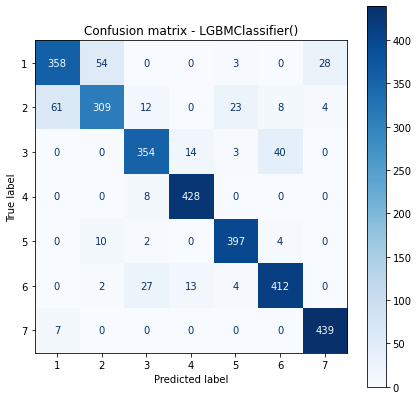

In [15]:
# Class parameters
df_train = df_train
df_test = df_test
model = LGBMClassifier()
add_eng_features = True
columns_to_convert_to_log = []
polynomial_degree = 0
columns_to_polynomial = []
add_climate = True
add_geographic = False
add_family = True
add_rocky = True
add_stony = True
keep_initial_rows = False
decomposition = None
columns_to_decomp = None
columns_to_drop = ['Id', 'ClimZone_3', 'GeoZone_5', 'F_Gothic', 'F_Troutville', 'F_Rogert', 'F_Bross', 'R_Limber_families', 'R_Aquolis', 'R_Cryoborolis', 'R_Cryaquolis', 'R_Borohemists', 'R_Cryaquepts', 'R_Cryaquolls'],
random_state = 2

cl = ClassifTools(df_train, df_test, model,
    add_eng_features,
    columns_to_convert_to_log,
    polynomial_degree, columns_to_polynomial,
    add_climate, add_geographic, add_family, add_rocky, add_stony,
    keep_initial_rows, columns_to_drop,
    None, None,
    random_state)
    
X_train, X_test, y_train, y_test = cl.split_trainset(target='Cover_Type', split_test_size=0.2)
model.fit(X_train, y_train)

from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(7, 7))

disp = plot_confusion_matrix(model, X_test, y_test, display_labels=range(1, 8), cmap=plt.cm.Blues, ax=ax)

plt.title('Confusion matrix - LGBMClassifier()')
plt.show()

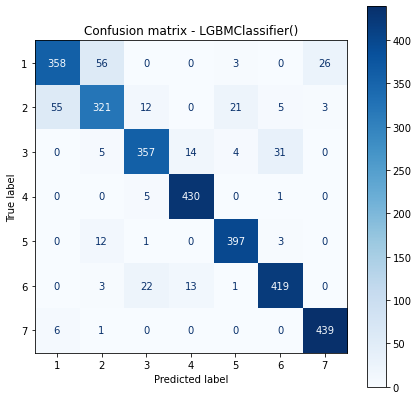

In [21]:
from sklearn.ensemble import HistGradientBoostingClassifier
# Class parameters
df_train = df_train
df_test = df_test
model = HistGradientBoostingClassifier()
add_eng_features = True
columns_to_convert_to_log = []
polynomial_degree = 0
columns_to_polynomial = []
add_climate = True
add_geographic = False
add_family = True
add_rocky = True
add_stony = True
keep_initial_rows = False
decomposition = None
columns_to_decomp = None
columns_to_drop = ['Id', 'ClimZone_3', 'GeoZone_5', 'F_Gothic', 'F_Troutville', 'F_Rogert', 'F_Bross', 'R_Limber_families', 'R_Aquolis', 'R_Cryoborolis', 'R_Cryaquolis', 'R_Borohemists', 'R_Cryaquepts', 'R_Cryaquolls'],
random_state = 2

cl = ClassifTools(df_train, df_test, model,
    add_eng_features,
    columns_to_convert_to_log,
    polynomial_degree, columns_to_polynomial,
    add_climate, add_geographic, add_family, add_rocky, add_stony,
    keep_initial_rows, columns_to_drop,
    None, None,
    random_state)
    
X_train, X_test, y_train, y_test = cl.split_trainset(target='Cover_Type', split_test_size=0.2)
model.fit(X_train, y_train)

from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(7, 7))

disp = plot_confusion_matrix(model, X_test, y_test, display_labels=range(1, 8), cmap=plt.cm.Blues, ax=ax)

plt.title('Confusion matrix - LGBMClassifier()')
plt.show()

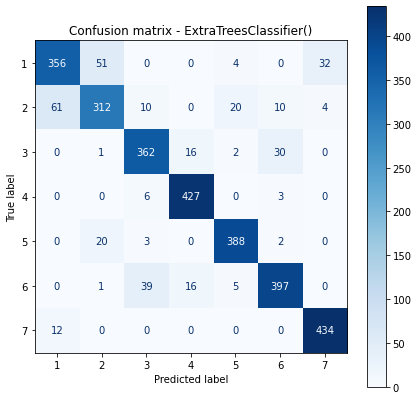

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
# Class parameters
df_train = df_train
df_test = df_test
model = ExtraTreesClassifier()
add_eng_features = True
columns_to_convert_to_log = []
polynomial_degree = 0
columns_to_polynomial = []
add_climate = True
add_geographic = False
add_family = True
add_rocky = True
add_stony = True
keep_initial_rows = False
decomposition = None
columns_to_decomp = None
columns_to_drop = ['Id', 'ClimZone_3', 'GeoZone_5', 'F_Gothic', 'F_Troutville', 'F_Rogert', 'F_Bross', 'R_Limber_families', 'R_Aquolis', 'R_Cryoborolis', 'R_Cryaquolis', 'R_Borohemists', 'R_Cryaquepts', 'R_Cryaquolls'],
random_state = 2

cl = ClassifTools(df_train, df_test, model,
    add_eng_features,
    columns_to_convert_to_log,
    polynomial_degree, columns_to_polynomial,
    add_climate, add_geographic, add_family, add_rocky, add_stony,
    keep_initial_rows, columns_to_drop,
    None, None,
    random_state)
    
X_train, X_test, y_train, y_test = cl.split_trainset(target='Cover_Type', split_test_size=0.2)
model.fit(X_train, y_train)

from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(7, 7))

disp = plot_confusion_matrix(model, X_test, y_test, display_labels=range(1, 8), cmap=plt.cm.Blues, ax=ax)

plt.title('Confusion matrix - ExtraTreesClassifier()')
plt.show()

After several tests, the best grouping of classes is as follows:

- Group 1 : Cover Type 1, 2, 5, 7
- Group 2 : Cover Type 3, 4, 6


In [2]:
y_train = df_train['Cover_Type']

In [3]:
# Create groups

first_group = [1, 2, 5, 7]
second_group = [3, 4, 6]
third_group = None

In [4]:
# Create two separated df based on groups
df_train_g1, df_train_g2 = split_in_groups(df_train, first_group, second_group, third_group=None)

In [5]:
df_train_g1

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,242642,2881,130,22,210,54,1020,250,221,88,...,0,0,0,0,0,0,0,0,0,1
1,309891,3005,351,14,242,-16,1371,194,215,159,...,0,0,0,0,0,0,0,0,0,1
2,287847,3226,63,14,618,2,1092,232,210,107,...,0,0,0,0,0,0,0,0,0,1
3,516307,3298,317,8,661,60,752,198,233,174,...,0,0,0,0,0,0,0,0,0,1
4,124860,3080,35,6,175,26,3705,219,227,144,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,475155,3328,321,13,323,12,5109,186,227,180,...,0,0,0,0,0,0,1,0,0,7
15116,514378,3455,37,5,841,92,939,220,229,146,...,0,0,0,0,0,0,0,0,1,7
15117,368425,3279,90,14,404,113,1513,240,218,105,...,0,0,0,0,0,0,0,0,0,7
15118,537844,3589,357,9,418,52,1868,205,223,155,...,0,0,0,0,0,0,0,0,1,7


In [6]:
# Create df_train_grouped
df_train_grouped = relabel(df_train, first_group, second_group, third_group=None, drop_cover_type=True)
df_train_grouped

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Group
0,242642,2881,130,22,210,54,1020,250,221,88,...,0,0,0,0,0,0,0,0,0,1
1,309891,3005,351,14,242,-16,1371,194,215,159,...,0,0,0,0,0,0,0,0,0,1
2,287847,3226,63,14,618,2,1092,232,210,107,...,0,0,0,0,0,0,0,0,0,1
3,516307,3298,317,8,661,60,752,198,233,174,...,0,0,0,0,0,0,0,0,0,1
4,124860,3080,35,6,175,26,3705,219,227,144,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,475155,3328,321,13,323,12,5109,186,227,180,...,0,0,0,0,0,0,1,0,0,1
15116,514378,3455,37,5,841,92,939,220,229,146,...,0,0,0,0,0,0,0,0,1,1
15117,368425,3279,90,14,404,113,1513,240,218,105,...,0,0,0,0,0,0,0,0,0,1
15118,537844,3589,357,9,418,52,1868,205,223,155,...,0,0,0,0,0,0,0,0,1,1


In [7]:
# Create groups
first_group = [1, 2, 5, 7]
second_group = [3, 4, 6]
third_group = None

df_train = pd.read_csv('./data/train.csv')
df_train_grouped = relabel(df_train, first_group, second_group, third_group=None, drop_cover_type=True)

# Class parameters
df_train = df_train_grouped
df_test = df_test
model = LGBMClassifier()
#model = LGBMClassifier(learning_rate=0.01, max_depth=32, num_iteration=1024, num_leaves=512, n_jobs=-1)
#model = ExtraTreesClassifier(n_estimators=300, max_features = None, min_samples_leaf= 1, min_samples_split= 2)
add_eng_features = False
add_climate = False
add_geographic = False
add_family = True
add_rocky = True
add_stony = True
keep_initial_rows = False
columns_to_drop = ['ClimZone_3', 'GeoZone_5', 'F_Gothic', 'F_Troutville', 'F_Rogert', 'F_Bross', 'R_Limber_families', 'R_Aquolis', 'R_Cryoborolis', 'R_Cryaquolis', 'R_Borohemists', 'R_Cryaquepts', 'R_Cryaquolls']
random_state = 2

modelling_class = ClassifTools(df_train, df_test, model,
    add_eng_features,
    add_climate, add_geographic, add_family, add_rocky, add_stony,
    keep_initial_rows, columns_to_drop,
    random_state)

cl = modelling_class
pred_group, acc, mat, test_details, pred_time = cl.test_predict(export_file=False, compute_local_metrics=True, target='Cover_Group')

df_train_test = test_details[0].join(y_train)
df_train_test['group_true'] = test_details[1]
df_train_test['group_pred'] = test_details[2]
print(df_train_test[df_train_test['group_pred'] != df_train_test['group_true']]['Cover_Type'].value_counts())

export_metrics(acc, mat, pred_time, cl)
print_results(acc, mat, pred_time, cl)


enriching the data...
number of features: 36
   -- took 54.82 sec
training model...
   -- took 0.21 sec
predicting test_set...
   -- took 0.56 sec
computing local metrics...
[]
   -- took 1.75 sec
> SUCCESS
2    16
5     7
6     5
3     4
Name: Cover_Type, dtype: int64
-------------------------
- Parameters:  {'model': LGBMClassifier(), 'add_eng_features': False, 'add_climate': False, 'add_geographic': False, 'add_family': True, 'add_rocky': True, 'add_stony': True, 'keep_initial_rows': False, 'columns_to_drop': ['ClimZone_3', 'GeoZone_5', 'F_Gothic', 'F_Troutville', 'F_Rogert', 'F_Bross', 'R_Limber_families', 'R_Aquolis', 'R_Cryoborolis', 'R_Cryaquolis', 'R_Borohemists', 'R_Cryaquepts', 'R_Cryaquolls'], 'random_state': 2}
- Execution time: 57.53
- Accuracy: 0.9894
- Confusion matrix:


,true0,true1
pred0,1296,9
pred1,23,1696


In [8]:
df_test_group = df_test
df_test_group['Cover_Group'] = pred_group

In [9]:
# Create two separated df based on groups
df_test_g1, df_test_g2 = split_in_groups(df_test_group, [1], [0], third_group=None, target='Cover_Group')

In [10]:
df_test_g1.drop(columns='Cover_Group', inplace=True)
df_test_g2.drop(columns='Cover_Group', inplace=True)

In [12]:
# Class parameters
df_train = df_train_g1
df_test = df_test_g1
model = LGBMClassifier()
#model = LGBMClassifier(learning_rate=0.01, max_depth=32, num_iteration=1024, num_leaves=512, n_jobs=-1)
#model = ExtraTreesClassifier(n_estimators=300, max_features = None, min_samples_leaf= 1, min_samples_split= 2)
add_eng_features = False
add_climate = False
add_geographic = False
add_family = True
add_rocky = True
add_stony = True
keep_initial_rows = False
columns_to_drop = ['ClimZone_3', 'GeoZone_5', 'F_Gothic', 'F_Troutville', 'F_Rogert', 'F_Bross', 'R_Limber_families', 'R_Aquolis', 'R_Cryoborolis', 'R_Cryaquolis', 'R_Borohemists', 'R_Cryaquepts', 'R_Cryaquolls']
random_state = 2

modelling_class5 = ClassifTools(df_train, df_test, model,
    add_eng_features,
    add_climate, add_geographic, add_family, add_rocky, add_stony,
    keep_initial_rows, columns_to_drop,
    random_state)

cl = modelling_class5
pred_g1, acc, mat, _, pred_time = cl.test_predict(export_file=True, compute_local_metrics=True, target='Cover_Type')
export_metrics(acc, mat, pred_time, cl)
print_results(acc, mat, pred_time, cl)

enriching the data...
number of features: 36
   -- took 49.77 sec
training model...
   -- took 0.41 sec
predicting test_set...
   -- took 1.4 sec
exporting file...
computing local metrics...
[]
   -- took 1.41 sec
> SUCCESS
-------------------------
- Parameters:  {'model': LGBMClassifier(), 'add_eng_features': False, 'add_climate': False, 'add_geographic': False, 'add_family': True, 'add_rocky': True, 'add_stony': True, 'keep_initial_rows': False, 'columns_to_drop': ['ClimZone_3', 'GeoZone_5', 'F_Gothic', 'F_Troutville', 'F_Rogert', 'F_Bross', 'R_Limber_families', 'R_Aquolis', 'R_Cryoborolis', 'R_Cryaquolis', 'R_Borohemists', 'R_Cryaquepts', 'R_Cryaquolls'], 'random_state': 2}
- Execution time: 53.67
- Accuracy: 0.8756
- Confusion matrix:


,true1,true5,true7,true2
pred1,350,59,10,29
pred5,64,325,35,4
pred7,0,7,405,0
pred2,6,0,1,433


In [18]:
# Class parameters
df_train = df_train_g2
df_test = df_test_g2
model = LGBMClassifier()
#model = LGBMClassifier(learning_rate=0.01, max_depth=32, num_iteration=1024, num_leaves=512, n_jobs=-1)
#model = ExtraTreesClassifier(n_estimators=300, max_features = None, min_samples_leaf= 1, min_samples_split= 2)
add_eng_features = True
add_climate = True
add_geographic = True
add_family = True
add_rocky = True
add_stony = True
keep_initial_rows = False
columns_to_drop = ['GeoZone_2', 'ClimZone_3', 'GeoZone_5', 'F_Gothic', 'F_Troutville', 'F_Rogert', 'F_Bross', 'R_Limber_families', 'R_Aquolis', 'R_Cryoborolis', 'R_Cryaquolis', 'R_Borohemists', 'R_Cryaquepts', 'R_Cryaquolls']
random_state = 2

modelling_class5 = ClassifTools(df_train, df_test, model,
    add_eng_features,
    add_climate, add_geographic, add_family, add_rocky, add_stony,
    keep_initial_rows, columns_to_drop,
    random_state)

cl = modelling_class5
pred_g2, acc, mat, _, pred_time = cl.test_predict(export_file=True, compute_local_metrics=True, target='Cover_Type')
export_metrics(acc, mat, pred_time, cl)
print_results(acc, mat, pred_time, cl)

enriching the data...
number of features: 50
   -- took 7.68 sec
training model...
   -- took 0.44 sec
predicting test_set...
   -- took 0.18 sec
exporting file...
computing local metrics...
[]
   -- took 1.56 sec
> SUCCESS
-------------------------
- Parameters:  {'model': LGBMClassifier(), 'add_eng_features': True, 'add_climate': True, 'add_geographic': True, 'add_family': True, 'add_rocky': True, 'add_stony': True, 'keep_initial_rows': False, 'columns_to_drop': ['GeoZone_2', 'ClimZone_3', 'GeoZone_5', 'F_Gothic', 'F_Troutville', 'F_Rogert', 'F_Bross', 'R_Limber_families', 'R_Aquolis', 'R_Cryoborolis', 'R_Cryaquolis', 'R_Borohemists', 'R_Cryaquepts', 'R_Cryaquolls'], 'random_state': 2}
- Execution time: 9.97
- Accuracy: 0.929
- Confusion matrix:


,true4,true3,true6
pred4,403,9,41
pred3,5,413,4
pred6,23,10,388


In [31]:
df_test_g1['pred'] = pred_g1
df_test_g2['pred'] = pred_g2
df_test_pred = pd.concat([df_test_g1, df_test_g2])
pred = df_test_pred['pred']

In [33]:
df = pd.DataFrame(pred)
df.reset_index(inplace=True)
df.rename({'index':'Id', 0:'Cover_type'}, axis='columns', inplace=True)
df['Id'] = df['Id'].apply(lambda x : x + 1)

In [37]:
print('exporting file...')
os.chdir('/Users/camilleepitalon/Documents/DSB/11_machine_learning_2/Project/')
try:
    os.chdir('answers')
except: 
    os.mkdir('answers')
    os.chdir('answers')
attempt_num = str(len(os.listdir()))
df.to_csv('full_submission'+attempt_num+'.csv', index=False)
os.chdir('..')
print("done")

exporting file...
done


Submitting the file on Kaggle, we got the **score of 0.80436** - far behind sinple classification.
So we decided to leave this idea aside.